In [10]:
import pandas as pd

# تحميل بيانات الجرائم من الملف
df = pd.read_csv("data/chicago_crime.csv.csv")

# عرض أول 5 صفوف
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/chicago_crime.csv.csv'

In [ ]:
# نسخة من البيانات الأصلية قبل التنظيف (اختياري)
df_original = df.copy()

# الأعمدة التي لا نحتاجها في التنبؤ
columns_to_drop = [
    'ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Updated On',
    'FBI Code', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'
]

# حذف الأعمدة غير المفيدة
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# حذف الصفوف التي تحتوي على قيم مفقودة في الأعمدة الأساسية فقط
df.dropna(subset=['Primary Type', 'Location Description', 'Date', 'Arrest'], inplace=True)

# تحويل عمود التاريخ إلى نوع datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# حذف الصفوف التي لم يتمكن من تحويل التاريخ فيها
df.dropna(subset=['Date'], inplace=True)

# إنشاء أعمدة إضافية من التاريخ
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# إعادة ضبط الفهرس بعد التنظيف
df.reset_index(drop=True, inplace=True)

# التحقق من النتيجة
print("✅ Cleaning Done. Current shape:", df.shape)
print("✅ Remaining missing values:\n", df.isnull().sum())


✅ Cleaning Done. Current shape: (8280030, 13)
✅ Remaining missing values:
 Date                         0
Primary Type                 0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614817
Community Area          613448
Year                         0
Hour                         0
DayOfWeek                    0
Month                        0
dtype: int64


In [ ]:
# حذف الأعمدة التي تحتوي على قيم مفقودة بنسبة كبيرة
df.drop(columns=['District', 'Ward', 'Community Area'], inplace=True)

# تأكيد الحذف
print("✅ Remaining columns after drop:")
print(df.columns)


✅ Remaining columns after drop:
Index(['Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'Year', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# اختيار الخصائص التي سنستخدمها في التنبؤ
features = df[['Primary Type', 'Location Description', 'Hour', 'DayOfWeek', 'Domestic']]
target = df['Arrest']

# نسخ البيانات لتحويلها
X = features.copy()

# تحويل البيانات النصية إلى أرقام باستخدام LabelEncoder
le_type = LabelEncoder()
X['Primary Type'] = le_type.fit_transform(X['Primary Type'])

le_loc = LabelEncoder()
X['Location Description'] = le_loc.fit_transform(X['Location Description'])

# تحويل Domestic من True/False إلى 0/1 (إن لم تكن بالفعل)
X['Domestic'] = X['Domestic'].astype(int)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

print("✅ Data ready for training.")


✅ Data ready for training.


In [ ]:
from sklearn.linear_model import LogisticRegression

# إنشاء النموذج مع موازنة الفئات تلقائيًا
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ بالبيانات الجديدة
y_pred = model.predict(X_test)

print("✅ Model training (with class_weight='balanced') complete.")


✅ Model training (with class_weight='balanced') complete.


🔍 Accuracy: 0.5358392421283498

🔍 Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.50      0.62   1235560
        True       0.30      0.64      0.41    420446

    accuracy                           0.54   1656006
   macro avg       0.55      0.57      0.51   1656006
weighted avg       0.68      0.54      0.56   1656006



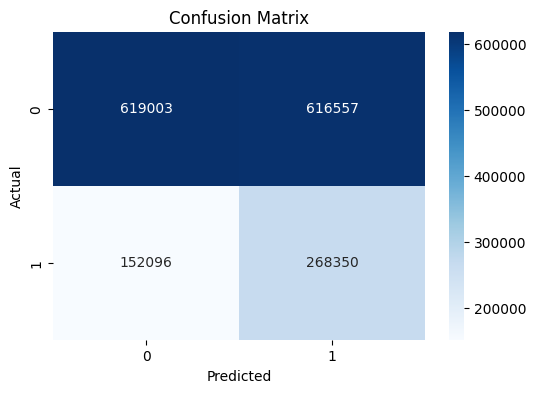

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# تقييم النموذج
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# مصفوفة الالتباس
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# إنشاء نموذج الغابة العشوائية
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# تدريب النموذج
rf_model.fit(X_train, y_train)

# التنبؤ
rf_pred = rf_model.predict(X_test)

print("✅ Random Forest training complete.")


✅ Random Forest training complete.


🔍 Accuracy: 0.8429830568246733

🔍 Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.89      0.89   1235560
        True       0.68      0.71      0.70    420446

    accuracy                           0.84   1656006
   macro avg       0.79      0.80      0.80   1656006
weighted avg       0.85      0.84      0.84   1656006



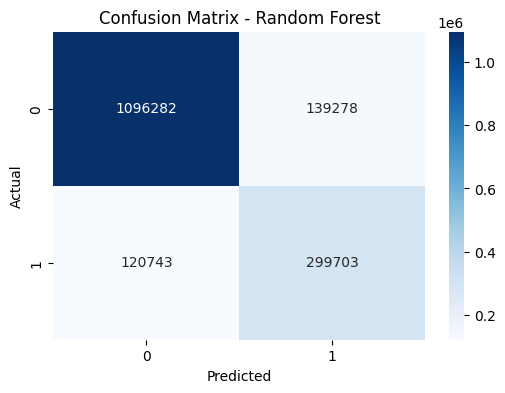

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# التقييم
print("🔍 Accuracy:", accuracy_score(y_test, rf_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, rf_pred))

# مصفوفة الالتباس
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
